In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from hopkins import Hopkins
from tqdm import tqdm


In [2]:
# 获取当前脚本文件所在目录的绝对路径
current_dir = os.getcwd()
# 构造 "data" 目录的路径
data_dir = os.path.join(current_dir, "../data")  # 返回上一级目录下的 "data" 目录
# 定义文件名
file_name = f"output_state_1vs1.txt"
file_path = os.path.join(data_dir, file_name)

In [3]:
# 读取文本文件
with open(file_path, 'r') as file:
    lines = file.readlines()

# 解析每行数据
data = []
for line in lines:
    row = list(map(float, line.strip().split()))
    data.append(row)

# 将数据转换为 NumPy 数组
import numpy as np
data_array = np.array(data)

print("Data shape:", data_array.shape)
print("Sample of data:")
print(data_array[:5])  # 打印前5行数据

Data shape: (67427, 12)
Sample of data:
[[ 1.80000e+02  1.90000e+00 -1.66812e+03  2.39900e+02 -1.66000e+01
   6.00000e+00  0.00000e+00  2.53650e+02  6.63789e+03  0.00000e+00
   0.00000e+00  1.00000e+01]
 [ 1.80000e+02  1.91000e+00 -1.66812e+03  2.39900e+02 -3.26000e+01
   6.00000e+00  0.00000e+00  2.67650e+02  6.63789e+03  0.00000e+00
   0.00000e+00  1.00000e+01]
 [ 1.80000e+02  1.93000e+00 -1.66812e+03  2.39900e+02 -4.86000e+01
   6.00000e+00  0.00000e+00  2.81650e+02  6.63789e+03  0.00000e+00
   0.00000e+00  3.20000e+01]
 [ 1.80000e+02  1.94000e+00 -1.66812e+03  2.39900e+02 -6.46000e+01
   6.00000e+00  0.00000e+00  2.95650e+02  6.63789e+03  0.00000e+00
   0.00000e+00  1.40000e+01]
 [ 1.79960e+02  1.95000e+00 -1.66811e+03  2.39900e+02 -8.06000e+01
   6.00000e+00  0.00000e+00  3.02960e+02  6.63789e+03  0.00000e+00
   0.00000e+00  1.00000e+00]]


In [4]:
labels = data_array[:, -1:].tolist()  # 提取最后两列作为标签，并转换为列表
# 创建字典来存储数据分组
grouped_data = {}

In [5]:
for i, label in enumerate(labels):
    label_key = tuple(label)
    if label_key not in grouped_data:
        grouped_data[label_key] = []
    grouped_data[label_key].append(data_array[i, :-1])  # 去除最后两列
# 打印每个分组中的数据数量
for label, group in grouped_data.items():
    print(f"Label {label}: {len(group)} samples")

Label (10.0,): 20848 samples
Label (32.0,): 132 samples
Label (14.0,): 10728 samples
Label (1.0,): 26799 samples
Label (27.0,): 8920 samples


In [6]:
for label, group in grouped_data.items():
    grouped_data[label] = np.array(group)

In [7]:
target_label = (27.0, )
if target_label in grouped_data:
    cluster_data = grouped_data[target_label]
    Hopkins_value = Hopkins(cluster_data)
    print(Hopkins_value)
else:
    Hopkins_value = 0.0

Hopkins: 100%|██████████| 892/892 [00:00<00:00, 1452.41it/s]

0.9594996579190604


In [14]:
# from HybridClustering import hybrid_clustering
# if(Hopkins_value>0.55):
#     kmeans_labels = hybrid_clustering(grouped_data[target_label],2,8920)
#     from WriteCluster import write_cluster_data, write_dbscan_cluster_data
#     write_cluster_data(grouped_data[target_label], kmeans_labels, "kmeans")

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=250, min_samples=2, metric='euclidean')
y_db = db.fit_predict(grouped_data[target_label])
from WriteCluster import write_cluster_data, write_dbscan_cluster_data
result_dir = 'D:/A_code/Cluster4Rule/result'
write_dbscan_cluster_data(grouped_data[target_label], y_db, "dbscan", result_dir)

In [ ]:
from boundaries import extract_boundaries
upper_bounds, lower_bounds = extract_boundaries('cluster_2_kmeans.txt')
print("\n")
print("kmeans Upper boundaries:", upper_bounds)
print("kmeans Lower boundaries:", lower_bounds)

TSNE: 100%|██████████| 100/100 [00:33<00:00,  2.95it/s]


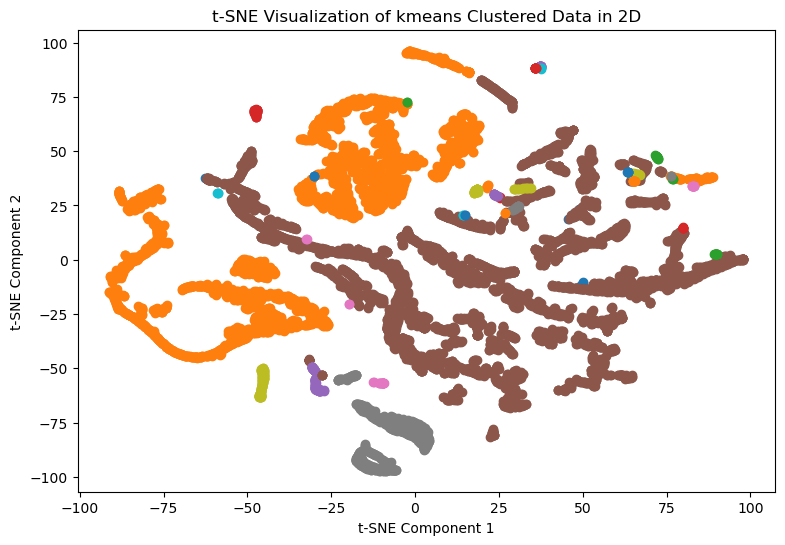

In [13]:
# 使用 t-SNE 进行降维，将数据投影到二维空间
tsne = TSNE(n_components=2, random_state=42)
with tqdm(total=100, desc="TSNE") as pbar:
    X_embedded = tsne.fit_transform(cluster_data)
    pbar.update(100)

# 绘制聚类结果的二维散点图
plt.figure(figsize=(9, 6))

# 绘制每个簇的数据点
for cluster_label in np.unique(y_db):
    visual_data = X_embedded[y_db == cluster_label]
    plt.scatter(visual_data[:, 0], visual_data[:, 1], label=f'Cluster {cluster_label}')

plt.title('t-SNE Visualization of kmeans Clustered Data in 2D')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# plt.legend()
plt.show()